In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [36]:
temp_df=pd.read_csv("temperatures.csv")
temp_df.shape
print(temp_df.describe())

         Unnamed: 0    avg_temp_c
count  16500.000000  16407.000000
mean    8249.500000     19.732877
std     4763.284056      9.579635
min        0.000000    -23.495000
25%     4124.750000     14.870000
50%     8249.500000     22.119000
75%    12374.250000     27.001500
max    16499.000000     38.283000


In [13]:
#Analizează distribuția temperaturilor medii în diferite orașe. Calculează media, mediana și deviația standard a temperaturilor medii și vizualizează rezultatele utilizând un histogramă

Mediana temperaturilor medii este: 22.119
Media temperaturilor medii este: 19.732876577070762
Deviatia standard a tempereturilor medii este: 9.579343382150395


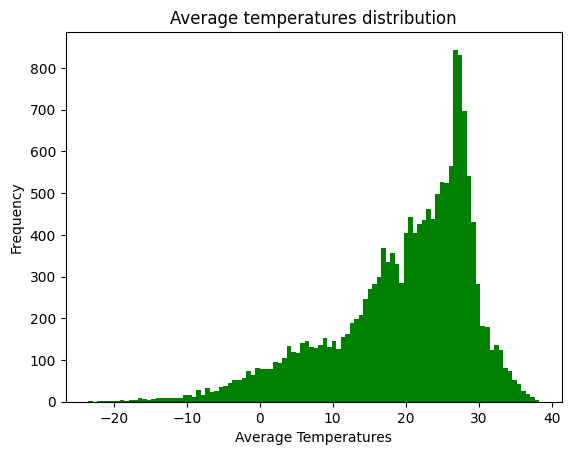

In [34]:
mediana=temp_df["avg_temp_c"].median()
print( f"Mediana temperaturilor medii este: {mediana}")
media=temp_df["avg_temp_c"].mean()
print( f"Media temperaturilor medii este: {media}")
deviatia_standard=np.std(temp_df["avg_temp_c"])
print( f"Deviatia standard a tempereturilor medii este: { deviatia_standard}")
plt.hist(temp_df["avg_temp_c"],bins=100,color="green")
plt.ylabel("Frequency")
plt.xlabel("Average Temperatures")
plt.title("Average temperatures distribution")
plt.show()

In [ ]:
#Investighează variația temperaturilor medii în timp. Vizualizează seriile de timp ale temperaturilor medii pentru unul sau mai multe orașe utilizând un grafic de linie

Insert a city:London


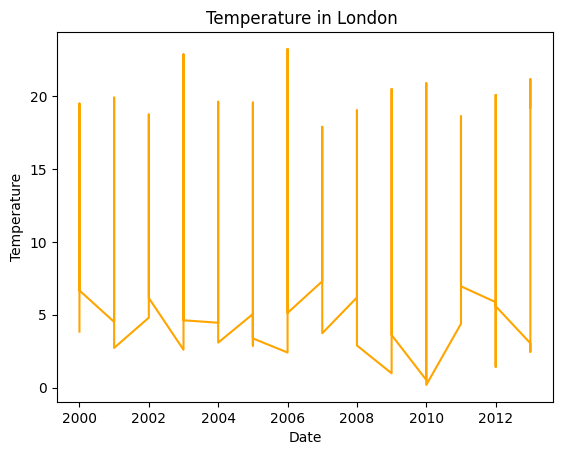

In [19]:
city_temp=[]
city_date=[]

city=input("Insert a city:")
for lab,row in temp_df.iterrows():
    temp_df['date'] = pd.to_datetime(temp_df['date'])
    temp_df['year'] = temp_df['date'].dt.year
for la,row in temp_df.iterrows():
    if row["city"] == city:
        city_temp.append(row["avg_temp_c"])
    if row["city"] == city:
        city_date.append(row["year"])


plt.plot(berlin_date,berlin_temp, color="orange")
plt.title(f"Temperature in {city} ")
plt.xlabel("Date")
plt.ylabel("Temperature")
plt.show()

In [ ]:
#Analizează temperaturile medii în funcție de țară (country). Calculează media temperaturilor medii pentru fiecare țară și vizualizează rezultatele utilizând un grafic de tip bară

             country  avg_temp_c
0      Côte D'Ivoire      27.293
1      Côte D'Ivoire      27.685
2      Côte D'Ivoire      29.061
3      Côte D'Ivoire      28.162
4      Côte D'Ivoire      27.547
...              ...         ...
16495          China      18.979
16496          China      23.522
16497          China      25.251
16498          China      24.528
16499          China         NaN

[16500 rows x 2 columns]
                                    avg_temp_c
country                                       
Afghanistan                          15.525756
Angola                               24.387659
Australia                            16.028104
Bangladesh                           26.164378
Brazil                               23.906030
Burma                                27.514213
Canada                                6.637158
Chile                                 6.345768
China                                12.983107
Colombia                             21.649607
Congo (Democra

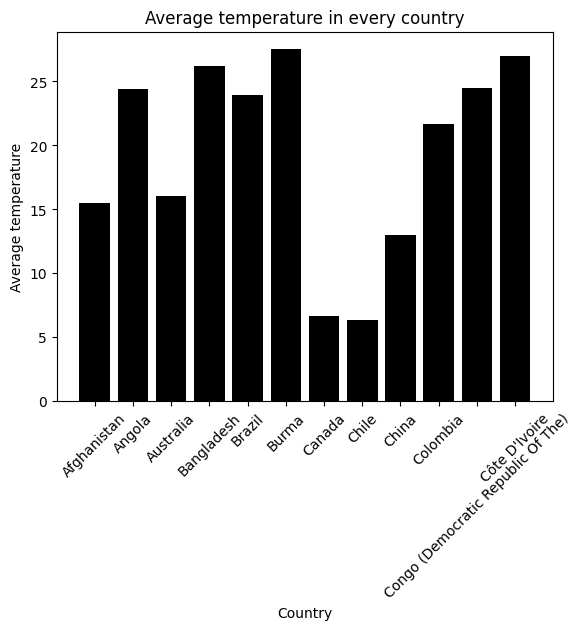

In [25]:

country_df=temp_df[["country","avg_temp_c"]]
print(country_df)
media_fiecare_tara=country_df.groupby(["country"]).mean()

print(media_fiecare_tara)
media_fiecare_tara_h=media_fiecare_tara.head(12)
media_avg=media_fiecare_tara_h["avg_temp_c"]
media_cou=media_fiecare_tara_h.index



plt.bar(media_cou,media_avg,color="black")
plt.xlabel("Country")
plt.ylabel("Average temperature")
plt.title("Average temperature in every country")
plt.xticks(rotation=45)
plt.show()


In [ ]:
#Investighează diferența de temperatură între orașe. Calculează diferența maximă și minimă a temperaturilor medii și vizualizează aceste diferențe utilizând un grafic de tip bară

            avg_temp_c        
                   min     max
city                          
Abidjan         24.280  29.596
Addis Abeba     16.620  21.223
Ahmadabad       18.856  35.419
Aleppo           3.063  32.629
Alexandria      13.399  28.806
...                ...     ...
Tokyo            0.573  27.295
Toronto        -11.382  21.956
Umm Durman      20.712  35.700
Wuhan            1.496  31.171
Xian            -4.811  26.094

[100 rows x 2 columns]
            avg_temp_c         diferenta
                   min     max          
city                                    
Abidjan         24.280  29.596     5.316
Addis Abeba     16.620  21.223     4.603
Ahmadabad       18.856  35.419    16.563
Aleppo           3.063  32.629    29.566
Alexandria      13.399  28.806    15.407
...                ...     ...       ...
Tokyo            0.573  27.295    26.722
Toronto        -11.382  21.956    33.338
Umm Durman      20.712  35.700    14.988
Wuhan            1.496  31.171    29.675
Xian     

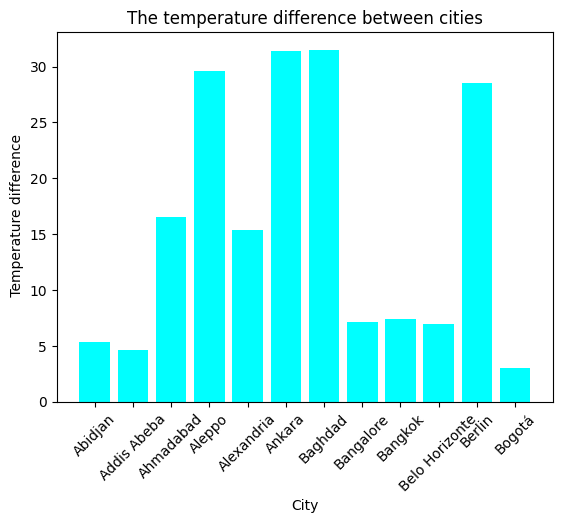

In [27]:
dif_dintre_min_si_max=temp_df.groupby("city").agg({"avg_temp_c":["min","max"]})
print(dif_dintre_min_si_max)

dif_dintre_min_si_max["diferenta"]=dif_dintre_min_si_max["avg_temp_c","max"]-dif_dintre_min_si_max["avg_temp_c","min"]
print(dif_dintre_min_si_max)


dif_temp=dif_dintre_min_si_max["diferenta",""].head(12)
dif_city=dif_dintre_min_si_max.head(12).index

plt.bar(dif_city,dif_temp,color="cyan")
plt.title("The temperature difference between cities")
plt.xlabel("City")
plt.ylabel(" Temperature difference")
plt.xticks(rotation=45)

plt.show()


In [ ]:
#Analizează variația temperaturilor medii în funcție de sezon. Grupați datele în funcție de lună și calculați media temperaturilor medii pentru fiecare lună.

      avg_temp_c
            mean
month           
1      12.738489
2      14.491669
3      17.513031
4      20.502414
5      23.118789
6      24.362819
7      24.912806
8      24.630888
9      23.030651
10     20.371361
11     17.032097
12     13.732679


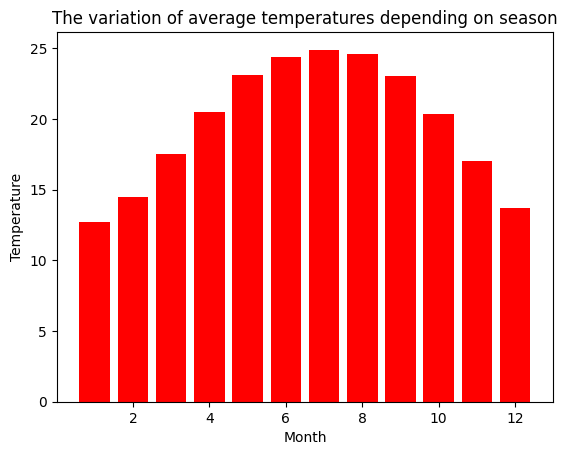

In [28]:
for lab,row in temp_df.iterrows():
    temp_df['date'] = pd.to_datetime(temp_df['date'])
    temp_df['month'] = temp_df['date'].dt.month

media_pe_luni=temp_df.groupby("month").agg({"avg_temp_c":["mean"]})
print(media_pe_luni)

m_luna=media_pe_luni.index
m_medie=media_pe_luni["avg_temp_c","mean"]

plt.bar(m_luna,m_medie, color="red")
plt.title("The variation of average temperatures depending on season")
plt.xlabel("Month")
plt.ylabel("Temperature")


plt.show()


In [ ]:
#Investighează corelația între temperatură și dată. Calculează coeficientul de corelație

In [29]:
date_temp_cor=temp_df[["avg_temp_c","year"]]
print(date_temp_cor)

corespondenta=date_temp_cor.corr()
print(corespondenta)



       avg_temp_c  year
0          27.293  2000
1          27.685  2000
2          29.061  2000
3          28.162  2000
4          27.547  2000
...           ...   ...
16495      18.979  2013
16496      23.522  2013
16497      25.251  2013
16498      24.528  2013
16499         NaN  2013

[16500 rows x 2 columns]
            avg_temp_c      year
avg_temp_c    1.000000  0.007291
year          0.007291  1.000000


In [ ]:
#Analizează temperaturile medii în funcție de anumite luni specifice. Selectează luni specifice (de exemplu, ianuarie și iulie) și comparați temperaturile medii între aceste luni

['London' 'Los Angeles' 'Luanda' 'Madras' 'Madrid']
            avg_temp_c
                   min
city                  
London           1.381
Los Angeles      8.196
Luanda          23.712
Madras          24.844
Madrid           1.912
            avg_temp_c
                   max
city                  
London          17.083
Los Angeles     23.596
Luanda          24.089
Madras          34.249
Madrid          22.305


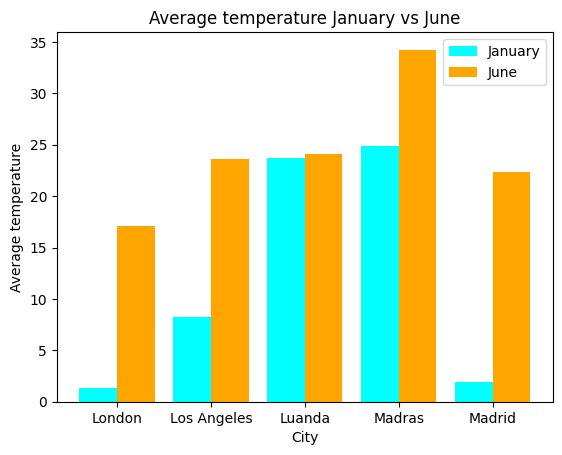

In [31]:
temp_iun=temp_df[temp_df["month"]==6]
temp_iun_c=temp_iun[["month","city","avg_temp_c"]]

temp_ian=temp_df[temp_df["month"]==1]
temp_ian_c=temp_ian[["month","city","avg_temp_c"]]

temp_ian_c_min=temp_ian_c.groupby("city").agg({"avg_temp_c":["min"]})
temp_iun_c_max=temp_iun_c.groupby("city").agg({"avg_temp_c":["max"]})
city_c=temp_df["city"].unique()

city_c_s=city_c[54:59]
temp_ian_c_min_s=temp_ian_c_min[54:59]
temp_iun_c_max_s=temp_iun_c_max[54:59]
print(city_c_s)
print(temp_ian_c_min_s)
print(temp_iun_c_max_s)



x=np.arange(5)
plt.bar(x-0.2,temp_ian_c_min_s["avg_temp_c","min"],0.4,label="January", color="cyan")
plt.bar(x+0.2,temp_iun_c_max_s["avg_temp_c","max"],0.4,label="June",color="orange")
plt.xticks(x,city_c_s)
plt.xlabel("City")
plt.ylabel("Average temperature")
plt.title("Average temperature January vs June")
plt.legend()
plt.show()


In [ ]:
#Investighează variația temperaturilor medii în diferite orașe în decursul anului

Insert a city:Paris
Insert a year:2007
[7.302, 7.572, 7.662000000000001, 14.296, 15.028, 17.679000000000006, 17.915, 17.573, 14.734000000000002, 10.833, 6.686999999999999, 3.729]


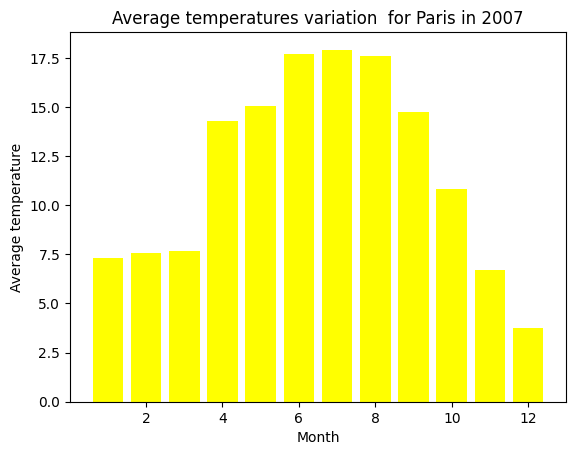

In [33]:
temp_list=[]
month_list=[]

city_input=input("Insert a city:")
year_input=int(input("Insert a year:"))

for lab,row in temp_df.iterrows():
    if row["city"]==city_input and row["year"]==year_input:
        temp_list.append(row["avg_temp_c"])
        month_list.append(row["month"])
        
        
print(temp_list)

plt.bar(month_list,temp_list, color="yellow")
plt.title(f"Average temperatures variation  for {city_input} in {year_input}")
plt.xlabel("Month")
plt.ylabel("Average temperature")
plt.show()
        